# Gradient Boosting Machines con XGBoost

In [0]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
house_price=pd.read_csv('https://assets.datacamp.com/production/course_3679/datasets/ames_housing_trimmed_processed.csv')


In [3]:
house_price.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


## Classification XGBoost
### Breast Cancer Dataset

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [5]:
X_cancer=data.data
y_cancer=data.target

from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.9649122807017544


* XGBoost gets its lauded performance and efficiency gains by utilizing its own optimized data structure for datasets called a `DMatrix`


In [7]:
# DMatrix
cancer_Dmatrix= xgb.DMatrix(data=X_cancer, label=y_cancer)

params={"objective":"reg:logistic","max_depth":3}

cv_results = xgb.cv(dtrain=cancer_Dmatrix, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)

print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   test-error-mean  test-error-std  train-error-mean  train-error-std
0         0.066824        0.019564          0.025480         0.002451
1         0.061524        0.013876          0.021969         0.001257
2         0.056252        0.010004          0.014945         0.006589
3         0.052734        0.011418          0.012306         0.003300
4         0.054497        0.012485          0.010549         0.004314
0.9455026666666666


In [8]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.973684


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### When to use XGBoost 

* You have a large number of training samples
    * Greater than 1000 training samples and less 100 features
    * The number of features < number of training samples
* You have a mixture of categorical and numeric features
    * Or just numeric features
    
#### When to NOT use XGBoost
* Image recognition
* Computer vision
* Natural language processing and understanding problems
* When the number of training samples is significantly smaller than the number of features

## Regression with XGBoost

#### Objective (loss) functions and base learners

* Quantifies how far off a prediction is from the actual result
* Measures the difference between estimated and true values for some collection of data
* Goal: Find the model that yields the minimum value of the loss function
Common Loss Functions and XGBoost

#### Common Loss Functions and XGBoost
* Loss function names in xgboost:
    * reg:linear - use for regression problems
    * reg:logistic - use for classification problems when you want just decision, not probability
    * binary:logistic - use when you want probability rather than just decision
    
#### Base Learners and Why we need them
* XGBoost involves creating a meta-model that is composed of many individual models that combine to give a final prediction
* Individual models = base learners
* Want base learners that when combined create final prediction that is non-linear
* Each base learner should be good at distinguishing or predicting different parts of the dataset
* Two kinds of base learners: tree and linear




In [9]:
from sklearn.metrics import mean_squared_error

X_house=house_price.iloc[:,0:-1]
y_house=house_price.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear",n_estimators=10,seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(preds, y_test))
print("RMSE: %f" % (rmse))

RMSE: 78847.401758


### Linear base learners
Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as `xgb.train()`
In order to do this you must create the parameter dictionary that describes the kind of booster you want to use
The key-value pair that defines the booster type (base model) you need is "booster":"gblinear"

In [11]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test =  xgb.DMatrix(data=X_test,label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train( dtrain= DM_train, params=params, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 43566.535658


In [12]:
housing_dmatrix = xgb.DMatrix(data=X_house, label=y_house)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   test-mae-mean  test-mae-std  train-mae-mean  train-mae-std
0  127634.000000   2404.009898   127343.482421     668.308109
1   90122.501953   2107.912810    89770.056641     456.965267
2   64278.558594   1887.567576    63580.791016     263.404950
3   46819.168945   1459.818607    45633.155274     151.883420
4   35670.646484   1140.607452    33587.090820      86.999396
4    35670.646484
Name: test-mae-mean, dtype: float64


## Regularization and base learners in XGBoost
* Regularization is a control on model complexity
* Want models that are both accurate and as simple as possible
* Regularization parameters in XGBoost:
    * gamma - minimum loss reduction allowed for a split to occur
    * alpha - l1 regularization on leaf weights, larger values mean more regularization
    * lambda - l2 regularization on leaf weights
    
#### Base Learners in XGBoost
* Linear Base Learner:
Sum of linear terms
Boosted model is weighted sum of linear models (thus is itself linear)
Rarely used
* Tree Base Learner:
Decision tree
Boosted model is weighted sum of decision trees (nonlinear)
Almost exclusively used in XGBoost

#### Creating DataFrames from multiple equal-length lists
* `pd.DataFrame(list(zip(list1,list2)),columns=["list1","list2"]))
* zip creates a generator of parallel values:
    * zip([1,2,3],["a","b""c"]) = [1,"a"],[2,"b"],[3,"c"]
    * generators need to be completely instantiated before they can be used in DataFrame objects
* list() instantiates the full generator and passing that into the DataFrame converts the whole expression`

In [13]:
reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.357421
1   10  57746.064453
2  100  76624.625000


### Visualizing individual XGBoost trees
Now that you've used XGBoost to both build and evaluate regression as well as classification models, you should get a handle on how to visually explore your models. Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.

XGBoost has a `plot_tree()` function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the `plot_tree()` function along with the number of trees you want to plot using the num_trees argument.

In [0]:
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

In [0]:
# Plot the fifth tree
xgb.plot_tree(xg_reg,num_trees=4)
fig = plt.gcf()
fig.set_size_inches(50, 25)
plt.show()

In [0]:
# Plot the last tree sideways
xgb.plot_tree(xg_reg,num_trees=9,rankdir="LR")
fig = plt.gcf()
fig.set_size_inches(100, 50)
fig.savefig('tree.png')
plt.show()

### Visualizing feature importances: What features are most important in my dataset
Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a `plot_importance()` function that allows you to do exactly this

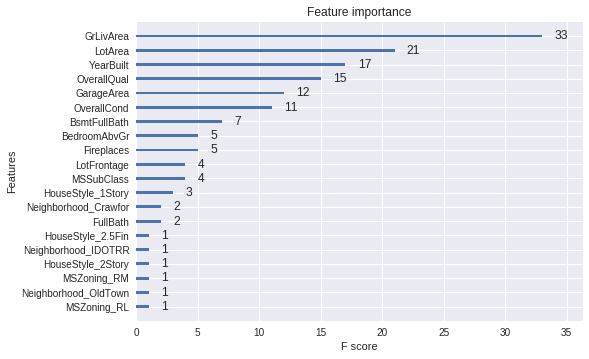

In [16]:
params = {"objective":"reg:linear","max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

### Tuning the number of boosting rounds
Let's start with parameter tuning by seeing how the number of boosting rounds (number of trees you build) impacts the out-of-sample performance of your XGBoost model. You'll use xgb.cv() inside a for loop and build one model per num_boost_round parameter.

In [17]:
# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

   num_boosting_rounds          rmse
0                    5  50903.299479
1                   10  34774.194010
2                   15  32895.098958


### Automated boosting round selection using early_stopping
Now, instead of attempting to cherry pick the best possible number of boosting rounds, you can very easily have XGBoost automatically select the number of boosting rounds for you within `xgb.cv()`. This is done using a technique called early stopping.

Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds. Here you will use the `early_stopping_rounds` parameter in `xgb.cv()` with a large possible number of boosting rounds (50). Bear in mind that if the holdout metric continuously improves up through when `num_boosting_rounds` is reached, then early stopping does not occur.

In [18]:
# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix,params=params,nfold=3,num_boost_round=50,metrics='rmse', early_stopping_rounds=10,as_pandas=True,seed=123)

# Print cv_results
print(cv_results)

    test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0    142640.656250     705.559400    141871.630208      403.632626
1    104907.664063     111.113862    103057.036458       73.769561
2     79262.059895     563.766991     75975.966146      253.726099
3     61620.136719    1087.694282     57420.529948      521.658354
4     50437.562500    1846.448017     44552.955729      544.170190
5     43035.658854    2034.471024     35763.949219      681.798925
6     38600.880208    2169.796232     29861.464844      769.571318
7     36071.817708    2109.795430     25994.675781      756.521419
8     34383.184896    1934.546688     23306.836588      759.238254
9     33509.139974    1887.375633     21459.770833      745.624404
10    32916.805990    1850.893363     20148.721354      749.612769
11    32197.832682    1734.456935     19215.382813      641.387376
12    31770.852865    1802.155484     18627.389323      716.256596
13    31482.782552    1779.123767     17960.695312      557.04

## Tunable parameters in XGBoost
### Common tree tunable parameters
* learning rate: learning rate/eta
* gamma: min loss reduction to create new tree split
* lambda: L2 reg on leaf weights
* alpha: L1 reg on leaf weights
* max_depth: max depth per tree
* subsample: % samples used per tree
* colsample_bytree: % features used per tree

### Linear tunable parameters
* lambda: L2 reg on weights
* alpha: L1 reg on weights
* lambda_bias: L2 reg term on bias
* You can also tune the number of estimators used for both base model types!

#### Tuning eta
It's time to practice tuning other XGBoost hyperparameters in earnest and observing their effect on model performance! You'll begin by tuning the "eta", also known as the learning rate.

The learning rate in XGBoost is a parameter that can range between 0 and 1, with higher values of "eta" penalizing feature weights more strongly, causing much stronger regularization.

In [19]:
params = {"objective":"reg:linear", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["rmse"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params,metrics='rmse',num_boost_round=10,early_stopping_rounds=5,nfold=3,seed=123,as_pandas=True)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

     eta    best_rmse
0  0.001  34774.19401
1  0.010  34774.19401
2  0.100  34774.19401


### Tuning max_depth
In this exercise, your job is to tune `max_depth`, which is the parameter that dictates the maximum depth that each tree in a boosting round can grow to. Smaller values will lead to shallower trees, and larger values to deeper trees.

In [20]:
params = {"objective":"reg:linear"}

# Create list of max_depth values
max_depths = [2,5,10,20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depths"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix,params=params,metrics='rmse',nfold=2,num_boost_round=10,early_stopping_rounds=5,seed=123,as_pandas=True)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

   max_depth     best_rmse
0          2  35922.521484
1          5  35922.521484
2         10  35922.521484
3         20  35922.521484


### Tuning colsample_bytree
Now, it's time to tune "colsample_bytree". You've already seen this if you've ever worked with scikit-learn's RandomForestClassifier or RandomForestRegressor, where it just was called max_features. In both xgboost and sklearn, this parameter (although named differently) simply specifies the fraction of features to choose from at every split in a given tree. In xgboost, colsample_bytree must be specified as a float between 0 and 1.

In [21]:
params={"objective":"reg:linear","max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1,0.5,0.8,1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree     best_rmse
0               0.1  44363.458985
1               0.5  36266.462890
2               0.8  35704.357422
3               1.0  35836.046875


### Grid Search and Random Search
#### Grid Search: 
* Search exhaustively over a given set of hyperparameters, once per set of hyperparameters
* Number of models = number of distinct values per hyperparameter multiplied across each hyperparameter
* Pick final model hyperparameter values that give best cross-validated evaluation metric value

#### Random Search: 
* Create a (possibly infinite) range of hyperparameter values per hyperparameter that you would like to search over
* Set the number of iterations you would like for the random search to continue
* During each iteration, randomly draw a value in the range of specified values for each hyperparameter searched over and train/evaluate a model with those hyperparameters
* After you've reached the maximum number of iterations, select the hyperparameter configuration with the best evaluated score

#### Grid Search with XGBoost
Now that you've learned how to tune parameters individually with XGBoost, let's take your parameter tuning to the next level by using scikit-learn's GridSearch and RandomizedSearch capabilities with internal cross-validation using the GridSearchCV and RandomizedSearchCV functions. You will use these to find the best model exhaustively from a collection of possible parameter values across multiple parameters simultaneously. Let's get to work, starting with GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,scoring='neg_mean_squared_error',cv=4,verbose=1)


# Fit grid_mse to the data
grid_mse.fit(X_house,y_house)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))


Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  29655.33697347771


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.4s finished


### Random Search with XGBoost
Often, GridSearchCV can be really time consuming, so in practice, you may want to use RandomizedSearchCV instead, as you will do in this exercise. The good news is you only have to make a few modifications to your GridSearchCV code to do RandomizedSearchCV. The key difference is you have to specify a param_distributions parameter instead of a param_grid parameter

In [23]:
from sklearn.model_selection import RandomizedSearchCV

gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid,scoring='neg_mean_squared_error',n_iter=5,cv=4,)


# Fit randomized_mse to the data
randomized_mse.fit(X_house,y_house)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Best parameters found:  {'n_estimators': 25, 'max_depth': 5}
Lowest RMSE found:  36636.35808132903


### Grid Search and Random Search Limitations
* Grid Search
    * Number of models you must build with every additional new parameter grows very quickly
* Random Search
    * Parameter space to explore can be massive
    * Randomly jumping throughout the space looking for a "best" result becomes a waiting game
    
## Using XGBoost in pipelines
### Preprocessing I: LabelEncoder and OneHotEncoder
* **LabelEncoder**: Converts a categorical column of strings into integers
* **OneHotEncoder**: Takes the column of integers and encodes them as dummy variables
* Cannot be done in a pipeline

### Preprocessing II: DictVectorizer
* Traditionally used in text processing
* Converts lists of feature mappings into vectors
* Need to convert DataFrame into a list of dictionary entries

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [0]:
unproc_house=pd.read_csv('https://assets.datacamp.com/production/course_3679/datasets/ames_unprocessed_data.csv')

In [26]:
unproc_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,2198,1,0,2,1,4,1,836,Y,250000


In [27]:
unproc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
MSSubClass      1460 non-null int64
MSZoning        1460 non-null object
LotFrontage     1201 non-null float64
LotArea         1460 non-null int64
Neighborhood    1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
Remodeled       1460 non-null int64
GrLivArea       1460 non-null int64
BsmtFullBath    1460 non-null int64
BsmtHalfBath    1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
Fireplaces      1460 non-null int64
GarageArea      1460 non-null int64
PavedDrive      1460 non-null object
SalePrice       1460 non-null int64
dtypes: float64(1), int64(15), object(5)
memory usage: 239.6+ KB


In [28]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
unproc_house.LotFrontage = unproc_house.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (unproc_house.dtypes == object)

# Get list of categorical column names
categorical_columns = unproc_house.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(unproc_house[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
unproc_house[categorical_columns] = unproc_house[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(unproc_house[categorical_columns].head())

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y
   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2


### Encoding categorical columns II: OneHotEncoder
Okay - so you have your categorical columns encoded numerically. Can you now move onto using pipelines and XGBoost? Not yet! In the categorical columns of this dataset, there is no natural ordering between the entries. As an example: Using LabelEncoder, the CollgCr Neighborhood was encoded as 5, while the Veenker Neighborhood was encoded as 24, and Crawfor as 6. Is Veenker "greater" than Crawfor and CollgCr? No - and allowing the model to assume this natural ordering may result in poor performance.

As a result, there is another step needed: You have to apply a one-hot encoding to create binary, or "dummy" variables. You can do this using scikit-learn's OneHotEncoder.

In [29]:
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categorical_features=categorical_mask,sparse=False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(unproc_house)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(unproc_house.shape)

# Print the shape of the transformed array
print(df_encoded.shape)

[[0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 6.000e+01 6.500e+01 8.450e+03
  7.000e+00 5.000e+00 2.003e+03 0.000e+00 1.710e+03 1.000e+00 0.000e+00
  2.000e+00 1.000e+00 3.000e+00 0.000e+00 5.480e+02 2.085e+05]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

### Encoding categorical columns III: DictVectorizer
Alright, one final trick before you dive into pipelines. The two step process you just went through - LabelEncoder followed by OneHotEncoder - can be simplified by using a DictVectorizer.

Using a DictVectorizer on a DataFrame that has been converted to a dictionary allows you to get label encoding as well as one-hot encoding in one go.

In [30]:
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = unproc_house.to_dict('records')

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

[[3.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00 5.480e+02
  1.710e+03 1.000e+00 5.000e+00 8.450e+03 6.500e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.000e+00 4.600e+02
  1.262e+03 0.000e+00 2.000e+00 9.600e+03 8.000e+01 2.000e+01 3.000e+00
  2.400e+01 8.000e+00 6.000e+00 2.000e+00 0.000e+00 1.815e+05 1.976e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 6.080e+02
  1.786e+03 1.000e+00 5.000e+00 1.125e+04 6.800e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 2.235e+05 2.001e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 1.000e+00 6.420e+02
  1.717e+03 0.000e+00 5.000e+00 9.550e+03 6.000e+01 7.000e+01 3.000e+00
  6.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 1.400e+05 1.915e+03]
 [4.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 8.360e+02
  2.198e+03 1.000e+00 5.000e+00 1.426e+04 8.400e+01 6.000e+0

### Pipeline

In [0]:
X_Uhouse=unproc_house.iloc[:,0:-1]
y_Uhouse=unproc_house.iloc[:,-1]

In [32]:


# Fill LotFrontage missing values with 0
X_Uhouse.LotFrontage = X_Uhouse.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

X_dict=X_Uhouse.to_dict('records')
# Fit the pipeline
xgb_pipeline.fit(X_dict,y_Uhouse)

Pipeline(memory=None,
     steps=[('ohe_onestep', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('xgb_model', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_ch...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

### Additional Components Introduced For Pipelines
* sklearn_pandas:
    * DataFrameMapper - Interoperability between pandas and scikit-learn
    * CategoricalImputer - Allow for imputation of categorical variables before conversion to integers
* sklearn.preprocessing:
    * Imputer - Native imputation of numerical columns in scikit-learn
* sklearn.pipeline:
    * FeatureUnion - combine multiple pipelines of features into a single pipeline of features

In [33]:
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X_Uhouse.LotFrontage = X_Uhouse.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=3, objective="reg:linear"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline,X_dict,y_Uhouse, scoring='neg_mean_squared_error',cv=10)

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  28440.796697477967


## Kidney disease case study I: Categorical Imputer
You'll now continue your exploration of using pipelines with a dataset that requires significantly more wrangling. The chronic kidney disease dataset contains both categorical and numeric features, but contains lots of missing values. The goal here is to predict who has [chronic kidney disease]('https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease#') given various blood indicators as features.

You'll be introduced to a new library, sklearn_pandas, that allows you to chain many more processing steps inside of a pipeline than are currently supported in scikit-learn. Specifically, you'll be able to impute missing categorical values directly using the `Categorical_Imputer()` class in `sklearn_pandas`, and the `DataFrameMapper()` class to apply any arbitrary sklearn-compatible transformer on DataFrame columns, where the resulting output can be either a NumPy array or DataFrame.

In this exercise, your task is to apply the CategoricalImputer to impute all of the categorical columns in the dataset. You can refer to how the numeric imputation mapper was created as a template. Notice the keyword arguments input_df=True and df_out=True? This is so that you can work with DataFrames instead of arrays. By default, the transformers are passed a numpy array of the selected columns as input, and as a result, the output of the DataFrame mapper is also an array. Scikit-learn transformers have historically been designed to work with numpy arrays, not pandas DataFrames, even though their basic indexing interfaces are similar.

In [34]:
# Some preprocessing
features_names=['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','rbc','pc','pcc','ba', 'htn','dm','cad','appet','pe','ane','class']
kidney_disease=pd.read_csv('https://assets.datacamp.com/production/course_3679/datasets/chronic_kidney_disease.csv',header=None,names=features_names,na_values='?')
kidney_disease.head()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [0]:
X_kidney=kidney_disease.iloc[:,0:-1]
y_kidney=kidney_disease.iloc[:,-1]

# converts to a Dict to be processed in DictVect



In [36]:
# Check number of nulls in each feature column
nulls_per_column = X_kidney.isnull().sum()
print(nulls_per_column)

age        9
bp        12
sg        47
al        46
su        49
bgr      152
bu        65
sc         4
sod        4
pot       44
hemo      19
pcv       17
wc        87
rc        88
rbc       52
pc        71
pcc      106
ba       131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [38]:
!pip install sklearn-pandas

In [0]:
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.preprocessing import Imputer

# Create a boolean mask for categorical columns
categorical_feature_mask = X_kidney.dtypes == object

# Get list of categorical column names
categorical_columns = X_kidney.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X_kidney.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature], Imputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )

### Kidney disease case study II: Feature Union
Having separately imputed numeric as well as categorical columns, your task is now to use scikit-learn's FeatureUnion to concatenate their results, which are contained in two separate transformer objects - numeric_imputation_mapper, and categorical_imputation_mapper, respectively.

In [0]:
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

### Kidney disease case study III: Full pipeline
It's time to piece together all of the transforms along with an XGBClassifier to build the full pipeline!

Besides the numeric_categorical_union that you created in the previous exercise, there are two other transforms needed: the Dictifier() transform which we created for you, and the DictVectorizer().

In [0]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import Imputer, LabelBinarizer

#helper class to allow DictVectorizer to work properly in pipeline with dataframe
class Dictifier(BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if type(X) == pd.core.frame.DataFrame:
            return X.to_dict("records")
        else:
            return pd.DataFrame(X).to_dict("records")

In [0]:
kidney_columns = ["age","bp","sg","al","su","rbc","pc","pcc","ba","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc","htn","dm","cad","appet","pe","ane","class"]
kidney_data = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/production/course_3970/datasets/chronic_kidney_disease.csv", header=None,names=kidney_columns,na_values="?")

kidney_columns = kidney_columns[:5]+kidney_columns[9:18]+kidney_columns[5:9]+kidney_columns[18:]
kidney_data = kidney_data[kidney_columns]

kidney_feature_names = kidney_data.columns.tolist()[:-1]
kidney_target_name = kidney_data.columns.tolist()[-1]

X,y = kidney_data[kidney_feature_names],kidney_data[kidney_target_name]

#convert target to numeric and reshape as cross_val_score only takes dimensionless arrays, not column vectors as input
y = LabelBinarizer().fit_transform(y)
y = y.reshape(y.shape[0],)



In [0]:
# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])



#cross_val_scores = cross_val_score(pipeline, X, y, scoring="roc_auc", cv=3)

# Print avg. AUC
#print("3-fold AUC: ", np.mean(cross_val_scores))

In [0]:
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200,50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline,param_distributions=gbm_param_grid,n_iter=2,scoring='roc_auc',cv=2,verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X,y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)